In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option("display.precision", 2)

In [7]:
data = pd.read_csv('train.csv', index_col='PassengerId')

In [8]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [10]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


In [11]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


In [12]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [13]:
age_categories = [age_category(age) for age in data.Age]
data['Age_category'] = age_categories

In [14]:
data['Age_category'] = data['Age'].apply(age_category)

1. Сколько мужчин и женщин находилось на борту?

In [17]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

2.Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

In [51]:
pd.crosstab(data['Pclass'], data['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


3.Каковы медиана и стандартное отклонение платежей (Fare)? 

In [20]:
data['Fare'].median()


14.4542

In [21]:
data['Fare'].std()

49.693428597180905

4. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [40]:
round(data[data['Sex'] == 'male']['Survived'].mean() * 100)


19

In [39]:
round(data[data['Sex'] == 'female']['Survived'].mean() * 100)

74

5. Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [34]:
data[data['Sex'] == 'male']['Name'].value_counts()

Johnson, Mr. Malkolm Joackim      1
Balkic, Mr. Cerin                 1
Woolner, Mr. Hugh                 1
Moubarek, Master. Gerios          1
Markoff, Mr. Marin                1
                                 ..
Allison, Master. Hudson Trevor    1
Futrelle, Mr. Jacques Heath       1
Bracken, Mr. James H              1
Hansen, Mr. Henry Damsgaard       1
Kraeff, Mr. Theodor               1
Name: Name, Length: 577, dtype: int64

In [37]:
hd = data[data['Sex'] == 'male']['Name'].apply(lambda full_name: full_name.split(',')[1].split()[1])
hd.value_counts()

William      35
John         25
George       14
Charles      13
Thomas       13
             ..
Percy         1
Herbert       1
Theodore      1
Ignjac        1
Engelhart     1
Name: Name, Length: 287, dtype: int64

6. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, не так ли?

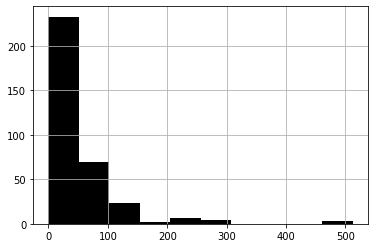

In [52]:
data[data['Survived'] == 1]['Fare'].hist(color="Black")

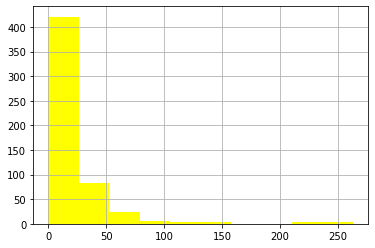

In [53]:
data[data['Survived'] == 0]['Fare'].hist(color="yellow")

In [48]:
data[data['Survived'] == 0].mean()

Survived         0.00
Pclass           2.53
Age             30.63
SibSp            0.55
Parch            0.33
Fare            22.12
Age_category     1.87
dtype: float64

In [49]:
data[data['Survived'] == 1].mean()

Survived         1.00
Pclass           1.95
Age             28.34
SibSp            0.47
Parch            0.46
Fare            48.40
Age_category     1.73
dtype: float64

**7. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**,
    - В среднем мужчины 1-го класса старше 40 лет,
    - В среднем женщины 1-го класса старше 40 лет,
    - Мужчины всех классов в среднем старше женщин того же класса,
    - В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [54]:

pd.crosstab(data['Pclass'], data['Sex'], values=data['Age'], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.61,41.28
2,28.72,30.74
3,21.75,26.51


Верны утверждения 1,2 и 4